In [8]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/30
292/292 - 6s - 22ms/step - accuracy: 0.7992 - loss: 0.6062 - val_accuracy: 0.9444 - val_loss: 0.2611
Epoch 2/30
292/292 - 5s - 18ms/step - accuracy: 0.9761 - loss: 0.1723 - val_accuracy: 0.9862 - val_loss: 0.1192
Epoch 3/30
292/292 - 11s - 37ms/step - accuracy: 0.9941 - loss: 0.0824 - val_accuracy: 0.9939 - val_loss: 0.0678
Epoch 4/30
292/292 - 9s - 30ms/step - accuracy: 0.9975 - loss: 0.0497 - val_accuracy: 0.9974 - val_loss: 0.0480
Epoch 5/30
292/292 - 6s - 20ms/step - accuracy: 0.9996 - loss: 0.0342 - val_accuracy: 0.9978 - val_loss: 0.0389
Epoch 6/30
292/292 - 9s - 30ms/step - accuracy: 0.9998 - loss: 0.0253 - val_accuracy: 0.9984 - val_loss: 0.0300
Epoch 7/30
292/292 - 6s - 21ms/step - accuracy: 0.9998 - loss: 0.0202 - val_accuracy: 0.9984 - val_loss: 0.0256
Epoch 8/30
292/292 - 8s - 29ms/step - accuracy: 0.9998 - loss: 0.0164 - val_accuracy: 0.9984 - val_loss: 0.0219
Epoch 9/30
292/292 - 8s - 26ms/step - accuracy: 0.9998 - loss: 0.0138 - val_accuracy: 0.9984 - val_loss

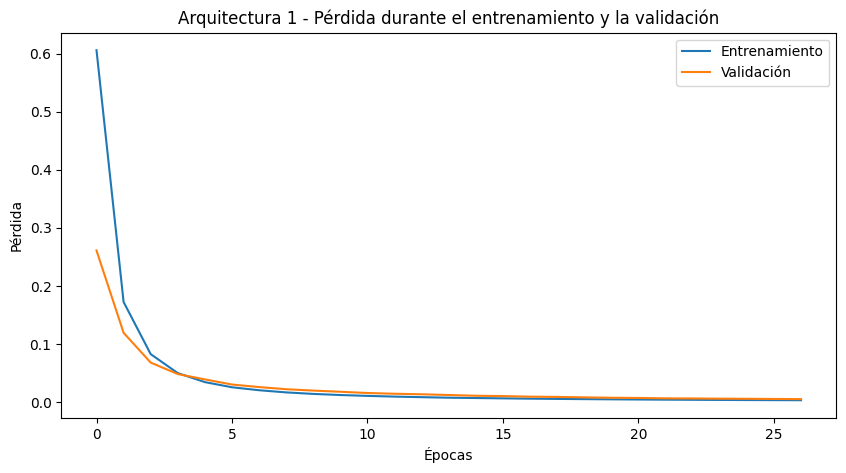

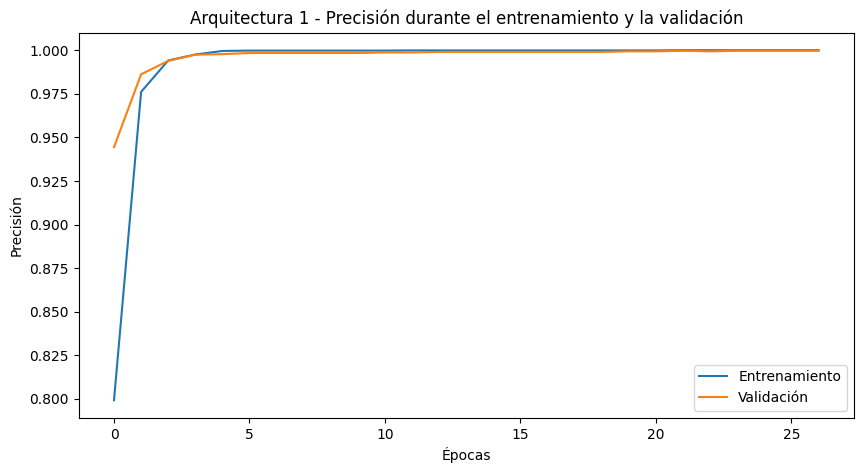

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


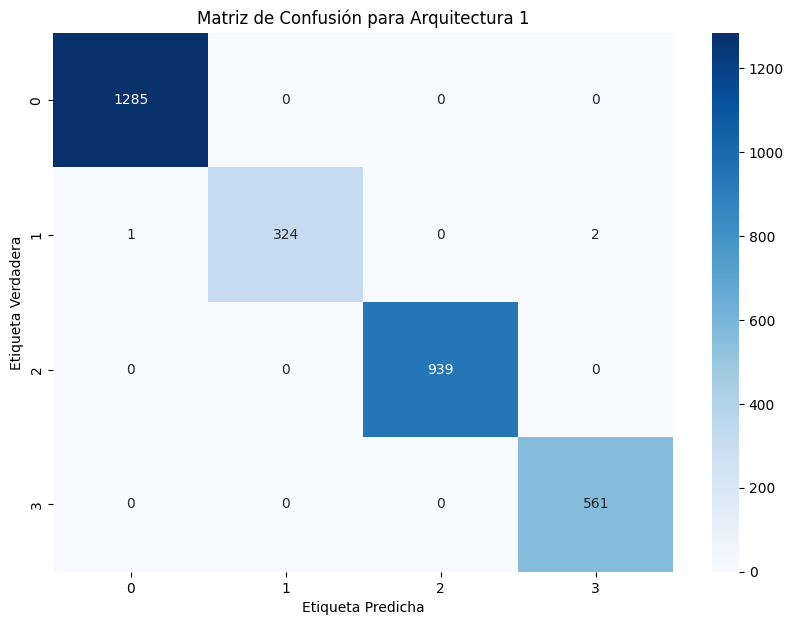

Reporte de clasificación para Arquitectura 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1285
           1       1.00      0.99      1.00       327
           2       1.00      1.00      1.00       939
           3       1.00      1.00      1.00       561

    accuracy                           1.00      3112
   macro avg       1.00      1.00      1.00      3112
weighted avg       1.00      1.00      1.00      3112

Epoch 1/30
292/292 - 7s - 23ms/step - accuracy: 0.7258 - loss: 0.7330 - val_accuracy: 0.7018 - val_loss: 0.6571
Epoch 2/30
292/292 - 12s - 40ms/step - accuracy: 0.9589 - loss: 0.1735 - val_accuracy: 0.9942 - val_loss: 0.0696
Epoch 3/30
292/292 - 8s - 27ms/step - accuracy: 0.9971 - loss: 0.0353 - val_accuracy: 0.9974 - val_loss: 0.0279
Epoch 4/30
292/292 - 12s - 40ms/step - accuracy: 0.9994 - loss: 0.0161 - val_accuracy: 0.9987 - val_loss: 0.0172
Epoch 5/30
292/292 - 6s - 20ms/step - accuracy: 0.9998 - loss: 0.0098

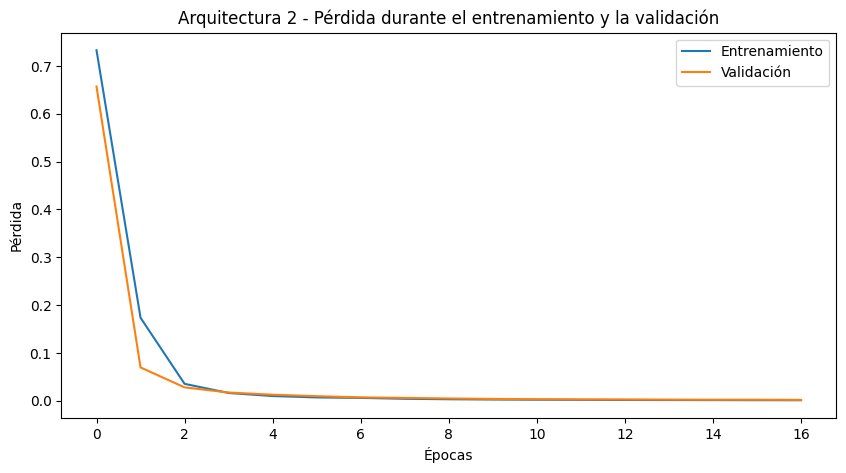

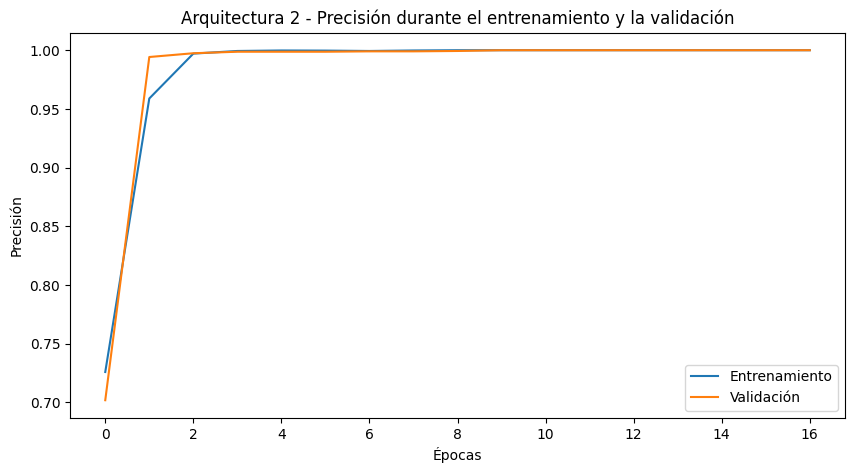

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


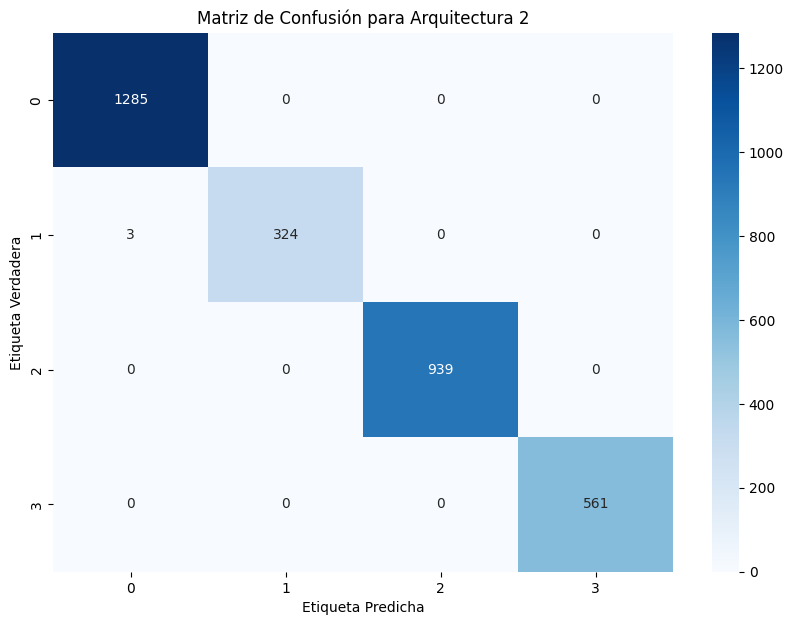

Reporte de clasificación para Arquitectura 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1285
           1       1.00      0.99      1.00       327
           2       1.00      1.00      1.00       939
           3       1.00      1.00      1.00       561

    accuracy                           1.00      3112
   macro avg       1.00      1.00      1.00      3112
weighted avg       1.00      1.00      1.00      3112

Epoch 1/30
292/292 - 9s - 31ms/step - accuracy: 0.8943 - loss: 0.3092 - val_accuracy: 0.9971 - val_loss: 0.0325
Epoch 2/30
292/292 - 11s - 37ms/step - accuracy: 0.9991 - loss: 0.0136 - val_accuracy: 0.9990 - val_loss: 0.0093
Epoch 3/30
292/292 - 6s - 21ms/step - accuracy: 0.9994 - loss: 0.0056 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 4/30
292/292 - 11s - 39ms/step - accuracy: 0.9882 - loss: 0.0401 - val_accuracy: 0.9990 - val_loss: 0.0072
Epoch 5/30
292/292 - 6s - 21ms/step - accuracy: 0.9998 - loss: 0.0019

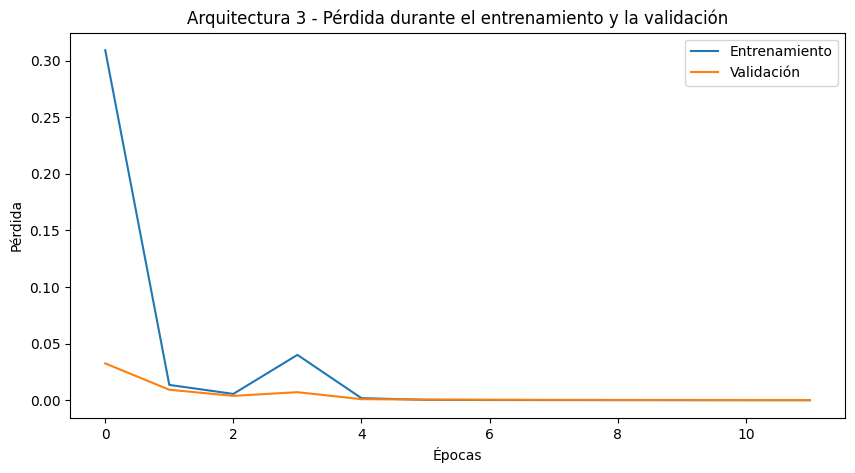

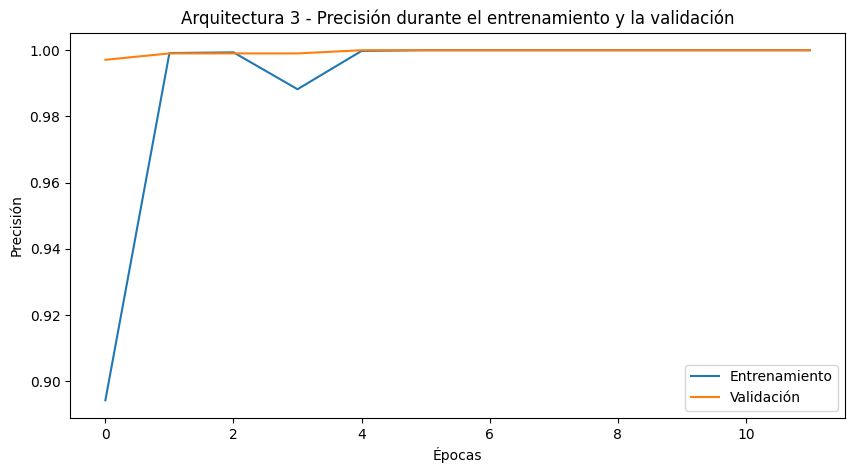

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


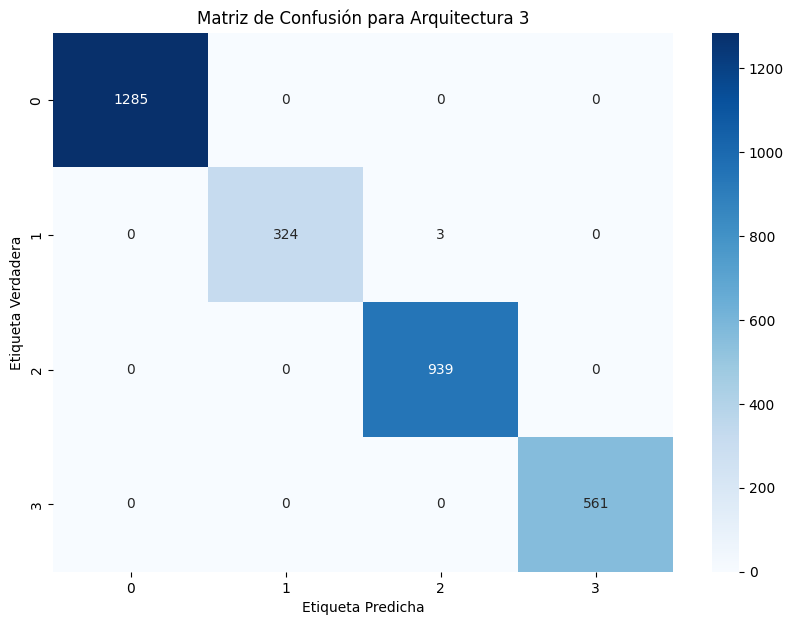

Reporte de clasificación para Arquitectura 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1285
           1       1.00      0.99      1.00       327
           2       1.00      1.00      1.00       939
           3       1.00      1.00      1.00       561

    accuracy                           1.00      3112
   macro avg       1.00      1.00      1.00      3112
weighted avg       1.00      1.00      1.00      3112



In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar imágenes
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Definir rutas y cargar los datos de las imágenes
stone_folder = '/content/drive/MyDrive/UTN/IA/Stone/'
normal_folder = '/content/drive/MyDrive/UTN/IA/Normal/'
cyst_folder = '/content/drive/MyDrive/UTN/IA/Cyst/'
tumor_folder = '/content/drive/MyDrive/UTN/IA/Tumor/'

normal_images, normal_labels = load_images(normal_folder, label=0)
stone_images, stone_labels = load_images(stone_folder, label=1)
cyst_images, cyst_labels = load_images(cyst_folder, label=2)
tumor_images, tumor_labels = load_images(tumor_folder, label=3)

X = np.concatenate((stone_images, normal_images, cyst_images, tumor_images), axis=0)
y = np.concatenate((stone_labels, normal_labels, cyst_labels, tumor_labels), axis=0)

# Escalar los valores de los píxeles y preparar las etiquetas
X = X / 255.0
X = X.reshape(-1, 128, 128, 1)
y = to_categorical(y, num_classes=4)

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Función para crear y entrenar modelos
def build_and_train_model(architecture, optimizer, epochs, batch_size):
    input_layer = Input(shape=(128, 128, 1))

    if architecture == 1:
        # Arquitectura 1: MLP básico (Multi-Perceptrón)
        flatten_layer = Flatten()(input_layer)
        hidden_layer_1 = Dense(150, activation='relu')(flatten_layer)
        output_layer = Dense(4, activation='softmax')(hidden_layer_1)

    elif architecture == 2:
        # Arquitectura 2: MLP más profundo
        flatten_layer = Flatten()(input_layer)
        hidden_layer_1 = Dense(200, activation='relu')(flatten_layer)
        hidden_layer_2 = Dense(150, activation='relu')(hidden_layer_1)
        hidden_layer_3 = Dense(100, activation='relu')(hidden_layer_2)
        output_layer = Dense(4, activation='softmax')(hidden_layer_3)

    elif architecture == 3:
        # Arquitectura 3: MLP pequeño (simplificado)
        flatten_layer = Flatten()(input_layer)
        hidden_layer_1 = Dense(100, activation='relu')(flatten_layer)
        hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
        output_layer = Dense(4, activation='softmax')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Early stopping callback
    early_stopping_monitor = callbacks.EarlyStopping(monitor='val_loss',
                                                     min_delta=0.01,
                                                     patience=10,
                                                     restore_best_weights=True)

    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping_monitor],
                        verbose=2)

    return model, history

# Función para evaluar el modelo
def evaluate_model(model, history, architecture):
    print(f"\n--- Evaluación del modelo para la Arquitectura {architecture} ---")

    # Evaluar en los datos de prueba
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Precisión del modelo en test: {test_accuracy}")

    # Graficar el progreso del error (Loss)
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Arquitectura {architecture} - Pérdida durante el entrenamiento y la validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

    # Graficar la precisión
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Arquitectura {architecture} - Precisión durante el entrenamiento y la validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

    # Matriz de confusión y reporte de clasificación
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para Arquitectura {architecture}')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

    print(f"Reporte de clasificación para Arquitectura {architecture}:")
    print(classification_report(y_true_classes, y_pred_classes))

# Entrenar y evaluar tres modelos con diferentes arquitecturas y parámetros
epochs = 30
batch_size = 32

# Entrenamiento para la Arquitectura 1
model_1, history_1 = build_and_train_model(architecture=1, optimizer=SGD(learning_rate=0.01), epochs=epochs, batch_size=batch_size)
evaluate_model(model_1, history_1, architecture=1)

# Entrenamiento para la Arquitectura 2
model_2, history_2 = build_and_train_model(architecture=2, optimizer=SGD(learning_rate=0.01), epochs=epochs, batch_size=batch_size)
evaluate_model(model_2, history_2, architecture=2)

# Entrenamiento para la Arquitectura 3
model_3, history_3 = build_and_train_model(architecture=3, optimizer=Adam(learning_rate=0.001), epochs=epochs, batch_size=batch_size)
evaluate_model(model_3, history_3, architecture=3)
